Epochs 9999, Train Loss: 0.13108883096349908, Validation Loss: 0.13772841828845186, Testing Loss: 0.13274856746897382, Testing Accuracy: 0.81475


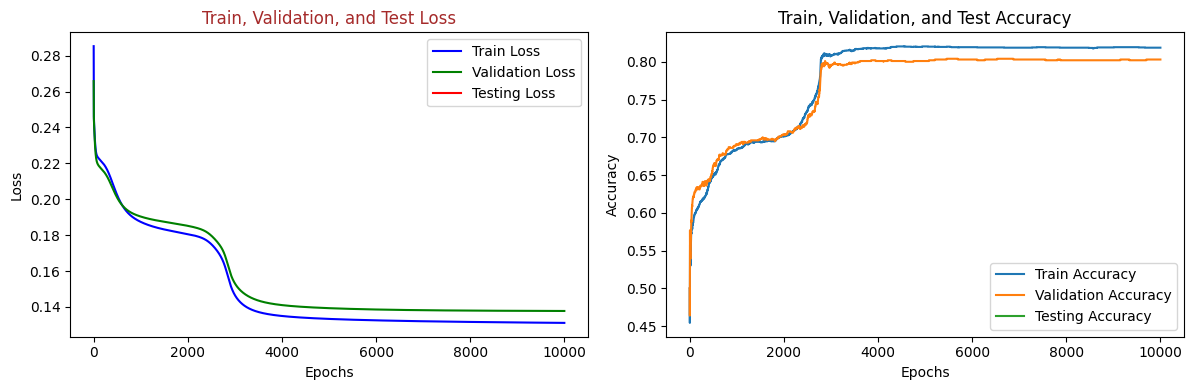

Epochs 9999, Train Loss: 0.13137509611216172, Validation Loss: 0.13791415689916484, Testing Loss: 0.1330096885807605, Testing Accuracy: 0.816


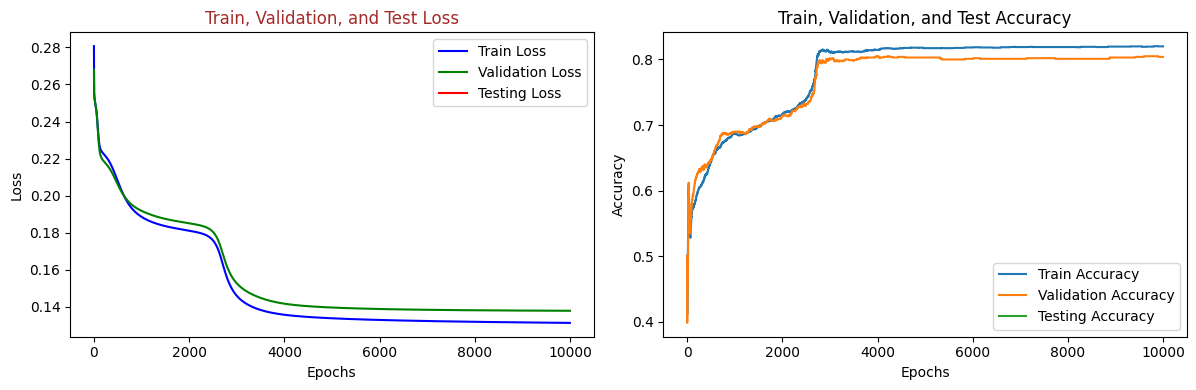

Epochs 9999, Train Loss: 0.13128138423817765, Validation Loss: 0.13780159000099984, Testing Loss: 0.13291124286128822, Testing Accuracy: 0.81475


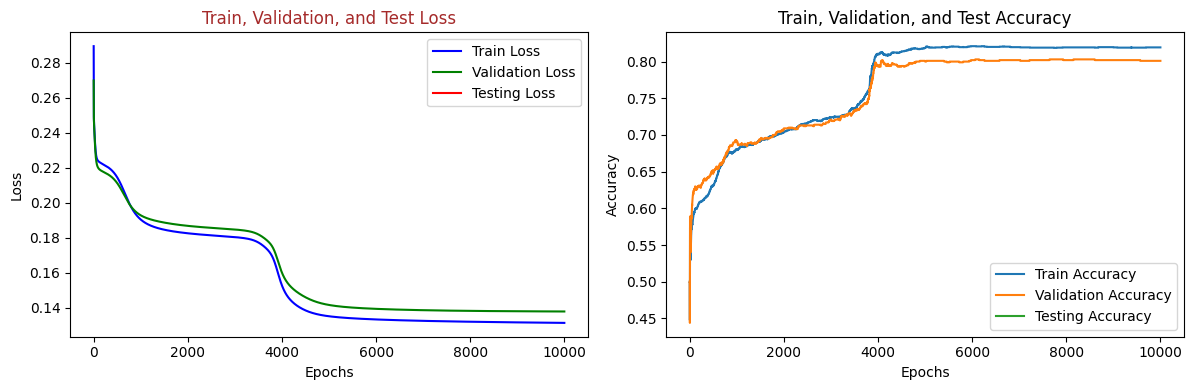

Epochs 9999, Train Loss: 0.17553391665164042, Validation Loss: 0.18363532073409614, Testing Loss: 0.17755908620355995, Testing Accuracy: 0.7295


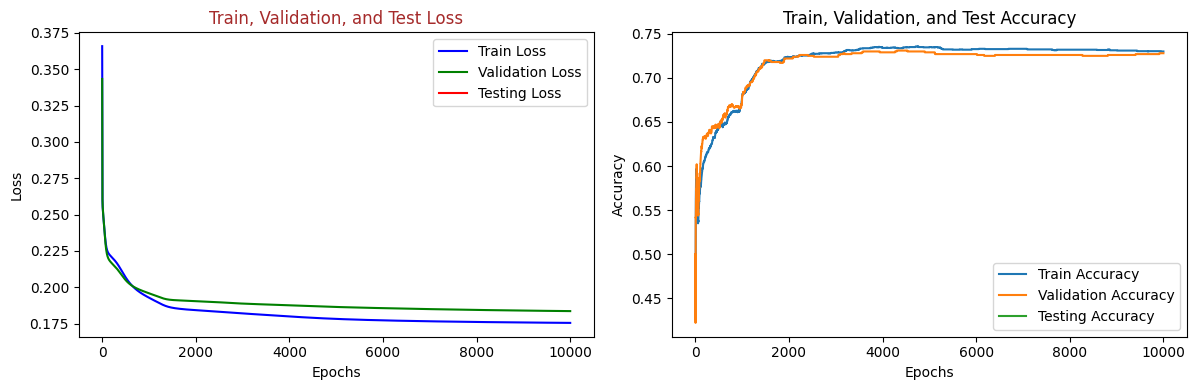

Epochs 9999, Train Loss: 0.13124753081577822, Validation Loss: 0.13778688867862907, Testing Loss: 0.13288218728567378, Testing Accuracy: 0.81525


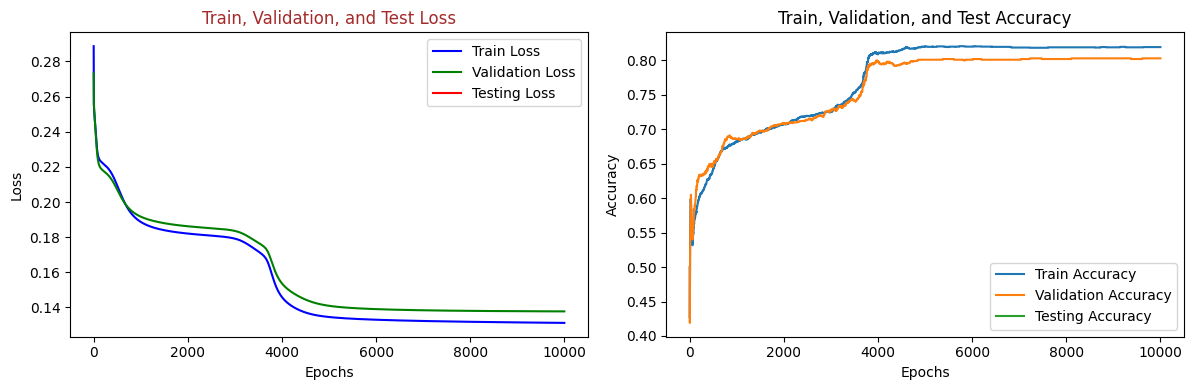

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class neuralNetwork:
    def __init__(self, input_si, hidd_size, out_size, l_rate=0.01):
        self.input = input_si
        self.hid = hidd_size
        self.out = out_size
        self.lear = l_rate
        self.weights = np.random.rand(self.input, self.hid)
        self.bias = np.zeros((1, self.hid))
        self.out_weight_hidden = np.random.rand(self.hid, self.out)
        self.out_bias = np.zeros((1, self.out))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_de(self, x):
        return x * (1 - x)

    def mean_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def acc(self, X, y):

        pred_out = self.forwardpass(X)
        pred_class = np.round(pred_out)
        correct = np.sum(pred_class == y)
        accur = correct / len(y)
        return accur

    def forwardpass(self, X):
        self.h_input = np.dot(X, self.weights) + self.bias
        self.h_out = self.sigmoid(self.h_input)
        self.out_in = np.dot(self.h_out, self.out_weight_hidden) + self.out_bias
        self.predicted_output = self.sigmoid(self.out_in)
        return self.predicted_output

    def backwardpass(self, X, y, backout):
        outputerror = y - backout
        outputdelta = outputerror * self.sigmoid_de(backout)
        herror = outputdelta.dot(self.out_weight_hidden.T)
        hdelta = herror * self.sigmoid_de(self.h_out)
        self.out_weight_hidden += self.h_out.T.dot(outputdelta) * self.lear
        self.out_bias += np.sum(outputdelta, axis=0, keepdims=True) * self.lear
        self.weights += X.T.dot(hdelta) * self.lear
        self.bias += np.sum(hdelta, axis=0, keepdims=True) * self.lear

    def model(self, X_train, y_train, X_validation, y_validation, X_test, y_test, max_epochs=10000):
        pre_loss = float('inf')

        # Lists to store metrics for plotting
        t_loss = []
        v_loss = []
        test_losses = []
        t_accuracy = []
        v_accuracy = []
        test_accuracies = []

        for i in range(max_epochs):
            # Forward and backward pass on the training set
            output = self.forwardpass(X_train)
            self.backwardpass(X_train, y_train, output)

            # Calculate training loss
            training_loss = self.mean_error(y_train, output)
            t_loss.append(training_loss)

            # Forward pass on the validation set
            validation_output = self.forwardpass(X_validation)

            # Calculate validation loss
            validation_loss = self.mean_error(y_validation, validation_output)
            v_loss.append(validation_loss)

            # Forward pass on the test set
            test_output = self.forwardpass(X_test)

            # Calculate test loss
            test_loss = self.mean_error(y_test, test_output)
            test_losses.append(test_loss)

            # Accuracy
            train_accuracy = self.acc(X_train, y_train)
            validation_accuracy = self.acc(X_validation, y_validation)
            test_accuracy = self.acc(X_test, y_test)

            t_accuracy.append(train_accuracy)
            v_accuracy.append(validation_accuracy)
            test_accuracies.append(test_accuracy)

            # Check for convergence (if validation loss stops decreasing)
            if validation_loss >= pre_loss:
                print("Validation loss no longer decreasing. Stopping training.")
                break

            pre_loss = validation_loss

        print(f'Epochs {i}, Train Loss: {training_loss}, Validation Loss: {validation_loss}, Testing Loss: {test_loss}, Testing Accuracy: {test_accuracy}')
        plt.figure(figsize=(18, 4))

        plt.subplot(1, 3, 1)
        plt.plot(t_loss, label='Train Loss',color="blue")
        plt.plot(v_loss, label='Validation Loss',color="green")
        plt.plot(test_loss, label='Testing Loss',color="red")
        plt.title('Train, Validation, and Test Loss',color="brown")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 3, 2)
        plt.plot(t_accuracy, label='Train Accuracy')
        plt.plot(v_accuracy, label='Validation Accuracy')
        plt.plot(test_accuracy, label='Testing Accuracy')
        plt.title('Train, Validation, and Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()



# Example usage
if __name__ == "__main__":
    i_size = 2
    o_size = 1
    l_rate = 0.001
    class1 = np.loadtxt("/content/Train1.txt")
    class2 = np.loadtxt("/content/Train2.txt")
    total_class = np.vstack((class1, class2))
    mean = np.mean(total_class, axis=0)
    standard_deviation = np.std(total_class, axis=0)
    class1 = (class1 - mean) / standard_deviation
    class2 = (class2 - mean) / standard_deviation
    class1Lables = np.zeros((class1.shape[0], 1))
    class2Lables = np.ones((class2.shape[0], 1))
    class1_combined = np.hstack((class1, class1Lables))
    class2_combined = np.hstack((class2, class2Lables))
    class1_combined_training = class1_combined[:1500, :]
    class2_combined_training = class2_combined[:1500, :]
    class1_combined_values = class1_combined[1500:, :]
    class2_combined_values = class2_combined[1500:, :]
    total_training = np.vstack((class1_combined_training, class2_combined_training))
    total_values = np.vstack((class1_combined_values, class2_combined_values))
    X_trainingset = total_training[:, :-1]
    y_trainingset = total_training[:, -1].reshape(-1, 1)
    X_validation_set = total_values[:, :-1]
    y_validation_set = total_values[:, -1].reshape(-1, 1)
    class1_data_test = np.loadtxt("/content/Test1.txt")
    class2_data_test = np.loadtxt("/content/Test2.txt")
    class1_data_test = (class1_data_test - mean) / standard_deviation
    class2_data_test = (class2_data_test - mean) / standard_deviation
    class1_labels_test = np.zeros((class1.shape[0], 1))
    class2_labels_test = np.ones((class2.shape[0], 1))
    class1_combined_test = np.hstack((class1, class1Lables))
    class2_combined_test = np.hstack((class2, class2Lables))
    total_test = np.vstack((class1_combined_test, class2_combined_test))
    X_test = total_test[:, :-1]
    y_test = total_test[:, -1].reshape(-1, 1)

    h = [4,8,10,12,14]
    for hidden in h:
      neural_network_hs4 = neuralNetwork(i_size, 4, o_size, l_rate)
      neural_network_hs4.model(X_trainingset, y_trainingset, X_validation_set, y_validation_set, X_test, y_test)
      accuracy_hs4_train = neural_network_hs4.acc(X_trainingset, y_trainingset)
      accuracy_hs4_validation = neural_network_hs4.acc(X_validation_set, y_validation_set)
      accuracy_hs4_test = neural_network_hs4.acc(X_test, y_test)

#Task 2


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(1, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 156s 82ms/step - loss: 0.1134 - accuracy: 0.9650 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 2/5
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0436 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0331 - val_accuracy: 0.9893
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 0.0419 - accuracy: 0.9892
Test accuracy: 0.9891999959945679


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1355 - accuracy: 0.9582 - val_loss: 0.0620 - val_accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0214 - accuracy: 0.9932 - val_loss: 0.0365 - val_accuracy: 0.9874
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 0.0315 - accuracy: 0.9907
Test accuracy: 0.9907000064849854


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: nan - accuracy: 0.1042 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 4/5
1875/1875 [==============================] - 66s 35ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.0980
Test accuracy: 0.09799999743700027


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='softmax', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='softmax'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(32, activation='softmax'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 238s 126ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 220s 118ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 216s 115ms/step - loss: 2.0705 - accuracy: 0.2062 - val_loss: 1.5211 - val_accuracy: 0.3126
Epoch 4/5
1875/1875 [==============================] - 208s 111ms/step - loss: 1.4311 - accuracy: 0.3204 - val_loss: 1.3790 - val_accuracy: 0.3569
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.1312 - accuracy: 0.4119
Test accuracy: 0.41190001368522644


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 180s 95ms/step - loss: 0.1273 - accuracy: 0.9591 - val_loss: 0.0564 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0424 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0241 - val_accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0378 - val_accuracy: 0.9881
Epoch 5/5
313/313 [==============================] - 9s 27ms/step - loss: 0.0419 - accuracy: 0.9894
Test accuracy: 0.9894000291824341
